<a href="https://colab.research.google.com/github/ggsgranados/TelecomX-LATAM-Parte-2/blob/main/Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports necesarios

In [11]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

##📌 Extracción del archivo tratado

In [12]:
# Importando el JSON y convirtiendolo a un DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/ggsgranados/TelecomX-LATAM-Parte-2/refs/heads/main/df_normalizado.csv')

In [13]:
df.head(5)

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias,Churn_Label
0,0.0,0,9,65.6,593.30,1,0,0,1,0,...,1,0,0,1,0,0,0,1,2.155059,Permaneció
1,0.0,0,9,59.9,542.40,0,1,1,0,1,...,0,0,1,0,0,0,0,1,1.967806,Permaneció
2,1.0,0,4,73.9,280.85,0,1,1,0,1,...,0,0,0,1,0,0,1,0,2.427727,Se dio de baja
3,1.0,1,13,98.0,1237.85,0,1,0,1,1,...,0,0,0,1,0,0,1,0,3.219448,Se dio de baja
4,1.0,1,3,83.9,267.40,1,0,0,1,1,...,0,0,0,1,0,0,0,1,2.756242,Se dio de baja


##❌ Eliminación de columnas irrelevantes

In [14]:
def remove_negative_dummies(df):
    columns_to_drop = []
    for col in df.columns:
        # Buscar columnas que terminen en '_No' o '_no'
        if col.endswith('_No') or col.endswith('_no'):
            # Identificar la columna correspondiente con lógica positiva
            positive_col_name_yes = col.replace('_No', '_Yes').replace('_no', '_yes')
            positive_col_name_blank = col.replace('_No', '_ ').replace('_no', '_ ')
            positive_col_name_single = col.replace('_No', '').replace('_no', '')

            # Verificar si la columna de lógica positiva existe
            if positive_col_name_yes in df.columns or positive_col_name_blank in df.columns or positive_col_name_single in df.columns:
                columns_to_drop.append(col)

    if columns_to_drop:
        print(f"\nEliminando las siguientes columnas con lógica negativa: {columns_to_drop}")
        df = df.drop(columns=columns_to_drop)
    else:
        print("\nNo se encontraron columnas con lógica negativa ('_No' o '_no') para eliminar.")

    return df

# Aplicar la función al DataFrame
df_normalizado = remove_negative_dummies(df)

print("\nColumnas después de eliminar las de lógica negativa:")
print(df_normalizado.columns.tolist())
print("\nEstado final del DataFrame:")
print(df_normalizado.info())


Eliminando las siguientes columnas con lógica negativa: ['Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'PaperlessBilling_No']

Columnas después de eliminar las de lógica negativa:
['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'gender_Female', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contrac

In [15]:
# Columnas a eliminar
columns_to_drop = ['gender_Female', 'Churn_Label']

# Verificar si las columnas existen en el DataFrame antes de eliminarlas
existing_columns_to_drop = [col for col in columns_to_drop if col in df_normalizado.columns]

if existing_columns_to_drop:
    print(f"\nEliminando las siguientes columnas: {existing_columns_to_drop}")
    df_normalizado = df_normalizado.drop(columns=existing_columns_to_drop)
else:
    print("\nLas columnas 'gender_Female' y 'Churn_Label' no se encontraron en el DataFrame.")

print("\nColumnas después de eliminar gender_Female y Churn_Label:")
print(df_normalizado.columns.tolist())
print("\nEstado final del DataFrame:")
print(df_normalizado.info())



Eliminando las siguientes columnas: ['gender_Female', 'Churn_Label']

Columnas después de eliminar gender_Female y Churn_Label:
['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Cuentas

## ✅ Verificación de la proporción de cancelación (Churn)

In [16]:
churn_proportion = df_normalizado['Churn'].value_counts(normalize=True)
print("\nProporción de clientes que cancelaron (Churn = 1) vs. activos (Churn = 0) :")
churn_proportion



Proporción de clientes que cancelaron (Churn = 1) vs. activos (Churn = 0) :


,proportion
Churn,
0.0,0.73463
1.0,0.26537


## ⚖️ Balanceo de clases

In [17]:
# Verificando valores NaN
if df_normalizado['Churn'].isnull().any():
    print("\Advertencia: Velores NaN encontrados. Eliminando valores NaN")
    df_normalizado.dropna(subset=['Churn'], inplace=True)

# Separando clases
df_majority = df_normalizado[df_normalizado.Churn==0]
df_minority = df_normalizado[df_normalizado.Churn==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123) # estado aleatorio para reproducibilidad

# combinando clases
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Mostrando nuevas clases
print("\nProporción de clases después del balanceo:")
print(df_balanced.Churn.value_counts(normalize=True))

print("\nEstado final del DataFrame balanceado:")
print(df_balanced.info())

# Asignando el balanceo
df_normalizado = df_balanced

\Advertencia: Velores NaN encontrados. Eliminando valores NaN

Proporción de clases después del balanceo:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Estado final del DataFrame balanceado:
<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 6827
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    10348 non-null  float64
 1   SeniorCitizen                            10348 non-null  int64  
 2   tenure                                   10348 non-null  int64  
 3   Charges.Monthly                          10348 non-null  float64
 4   Charges.Total                            10348 non-null  float64
 5   gender_Male                              10348 non-null  int64  
 6   Partner_Yes                              10348 non-null  int64  
 7   Dependents_Yes                           10348 non-null

In [18]:
df_normalizado.head(5)

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
0,0.0,0,9,65.60,593.30,0,1,1,1,0,...,0,0,1,0,1,0,0,0,1,2.155059
1,0.0,0,9,59.90,542.40,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,1.967806
5,0.0,0,9,69.40,571.45,0,0,1,1,0,...,1,1,0,0,1,0,1,0,0,2.279895
6,0.0,1,71,109.70,7904.25,0,1,0,1,0,...,1,0,0,1,1,1,0,0,0,3.603811
7,0.0,0,63,84.65,5377.80,1,1,0,1,0,...,0,0,0,1,1,0,1,0,0,2.780880


## 🔧 Normalización/Estandarización

In [19]:
# ## 🤖 Preparación de datos para el modelo (Normalización/Estandarización)

# Evaluar la necesidad de normalizar o estandarizar los datos.
# La estandarización (usando StandardScaler) es más adecuada cuando los datos siguen una distribución gaussiana.
# La normalización (usando MinMaxScaler) es más adecuada cuando se necesita que los datos estén en un rango específico [0, 1]
# o cuando los datos no siguen una distribución gaussiana y pueden tener valores atípicos.
# Dado que algunas características pueden no seguir una distribución gaussiana y para mantener los datos en un rango similar,
# se utilizará MinMaxScaler.

print("\nPreparando datos para el modelo: Normalización/Estandarización")

# Separar características (X) y variable objetivo (y)
X = df_normalizado.drop('Churn', axis=1)
y = df_normalizado['Churn']

# Identificar columnas numéricas para escalar (excluir las dummy/binarias)
# Las columnas dummy ya están en el rango [0, 1], por lo que no necesitan normalización.
# Suponemos que las columnas numéricas son aquellas con dtype float64 o int64, excluyendo la columna 'Churn' que ya se separó.
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()

print(f"\nColumnas numéricas a escalar: {numeric_cols}")

# Inicializar el escalador (MinMaxScaler)
scaler = MinMaxScaler()

# Aplicar normalización solo a las columnas numéricas
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("\nDatos escalados (MinMaxScaler) aplicados a columnas numéricas.")

print("\nEstado final del DataFrame después de la normalización:")
print(X.info())


Preparando datos para el modelo: Normalización/Estandarización

Columnas numéricas a escalar: ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Cuentas_Diarias']

Datos escalados (MinMaxScaler) 

In [20]:
# Mostrar una muestra de los datos escalados
print("\nPrimeras 5 filas del DataFrame con datos escalados:")
X.head(5)


Primeras 5 filas del DataFrame con datos escalados:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
0,0.0,0.125000,0.471144,0.068315,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.471144
1,0.0,0.125000,0.414428,0.062454,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.414428
5,0.0,0.125000,0.508955,0.065799,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.508955
6,1.0,0.986111,0.909950,0.910125,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.909950
7,0.0,0.875000,0.660697,0.619220,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.660697


## ⛓️ Análisis de correlación


Matriz de Correlación de las variables:
                                         SeniorCitizen    tenure  \
SeniorCitizen                                 1.000000  0.007692   
tenure                                        0.007692  1.000000   
Charges.Monthly                               0.204081  0.221379   
Charges.Total                                 0.081321  0.856156   
gender_Male                                   0.000100  0.019886   
Partner_Yes                                   0.024031  0.381754   
Dependents_Yes                               -0.217833  0.174066   
PhoneService_Yes                              0.009509  0.014658   
MultipleLines_No phone service               -0.009509 -0.014658   
MultipleLines_Yes                             0.151180  0.312792   
InternetService_DSL                          -0.119179  0.012664   
InternetService_Fiber optic                   0.244469 -0.015390   
InternetService_No                           -0.179493  0.004886   
OnlineS

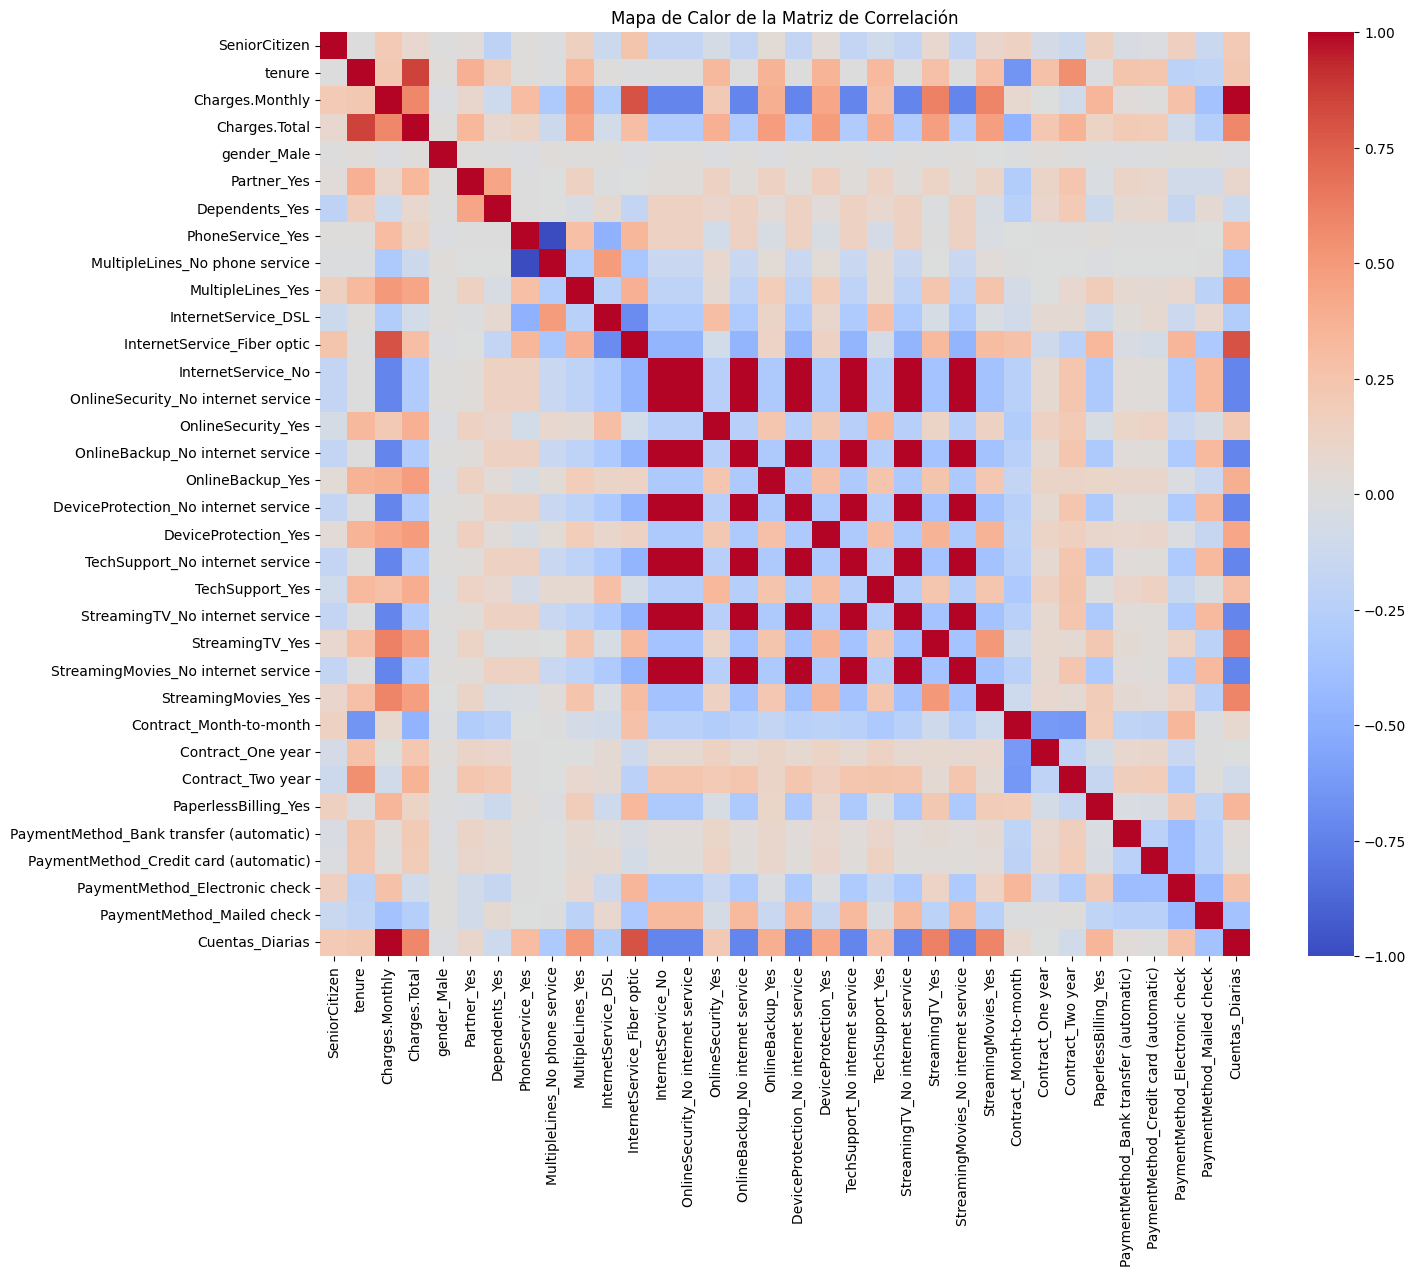


Correlación de las variables con la variable objetivo 'Churn':
Churn                                      1.000000
Contract_Month-to-month                    0.483068
InternetService_Fiber optic                0.347631
PaymentMethod_Electronic check             0.336818
Charges.Monthly                            0.229378
Cuentas_Diarias                            0.229378
PaperlessBilling_Yes                       0.219138
SeniorCitizen                              0.159411
StreamingTV_Yes                            0.073714
StreamingMovies_Yes                        0.070878
MultipleLines_Yes                          0.048744
PhoneService_Yes                           0.007850
MultipleLines_No phone service            -0.007850
gender_Male                               -0.012370
DeviceProtection_Yes                      -0.079399
OnlineBackup_Yes                          -0.088804
PaymentMethod_Mailed check                -0.112698
InternetService_DSL                       -0.145399


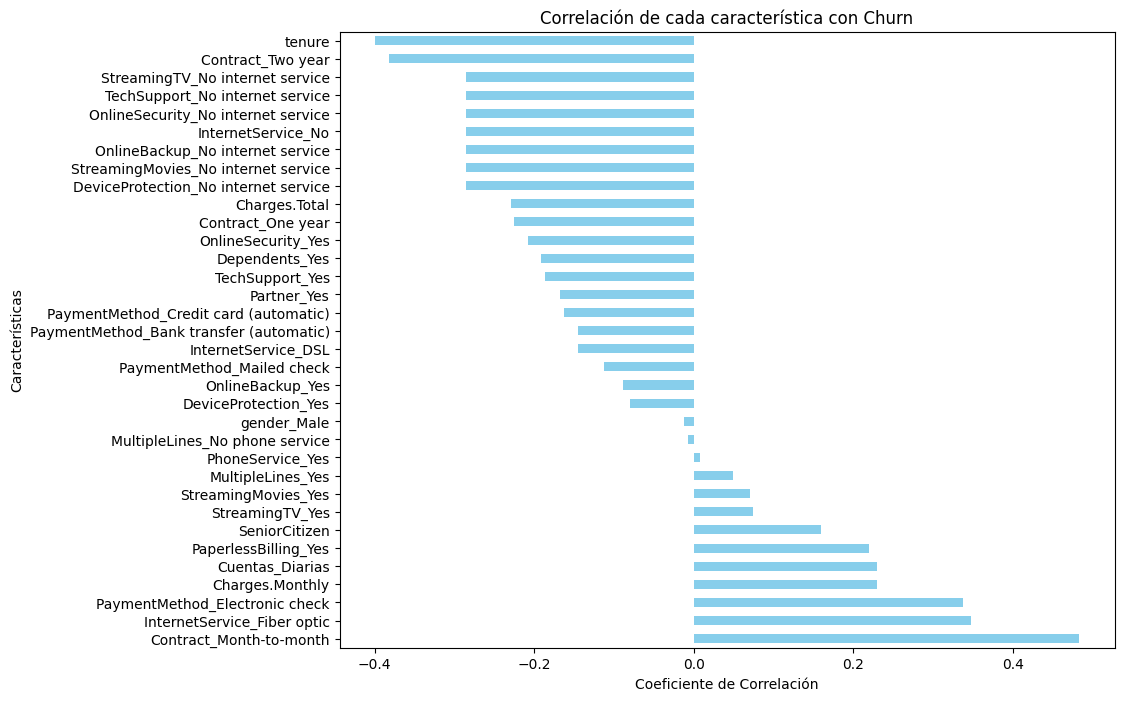

In [23]:
# Calcular la matriz de correlación
correlation_matrix = X.corr()

# Imprimir la matriz de correlación
print("\nMatriz de Correlación de las variables:")
print(correlation_matrix)

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()


# Dado que 'Churn' se separó en 'y', podemos calcular la correlación de cada característica con 'y'
# Esto requiere concatenar X e y temporalmente o calcular la correlación por separado.
# Uniendo temporalmente X e y para calcular la correlación con la variable objetivo
df_combined = pd.concat([X, y], axis=1)

# Calcular la matriz de correlación del DataFrame combinado
correlation_matrix_combined = df_combined.corr()

# Extraer la correlación de todas las variables con 'Churn'
correlation_with_churn = correlation_matrix_combined['Churn'].sort_values(ascending=False)

print("\nCorrelación de las variables con la variable objetivo 'Churn':")
print(correlation_with_churn)

# Visualizar la correlación con 'Churn'
plt.figure(figsize=(10, 8))
correlation_with_churn.drop('Churn').plot(kind='barh', color='skyblue')
plt.title('Correlación de cada característica con Churn')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Características')
plt.show()

# Eliminar el DataFrame combinado temporal
del df_combined

## 📊 Análisis dirigido

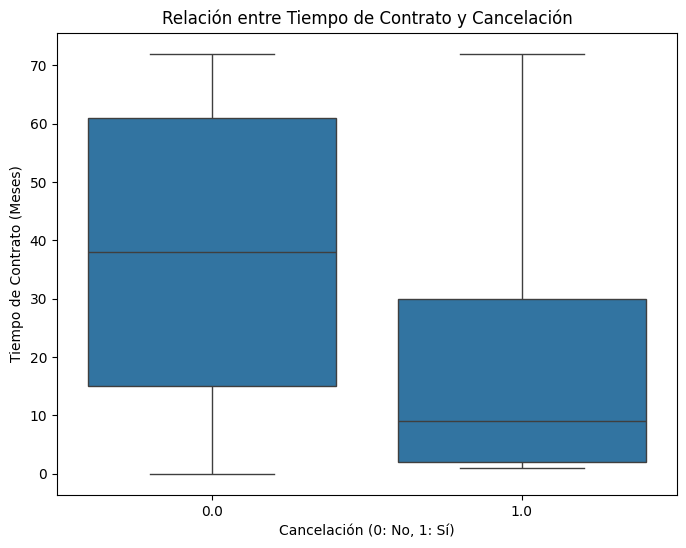

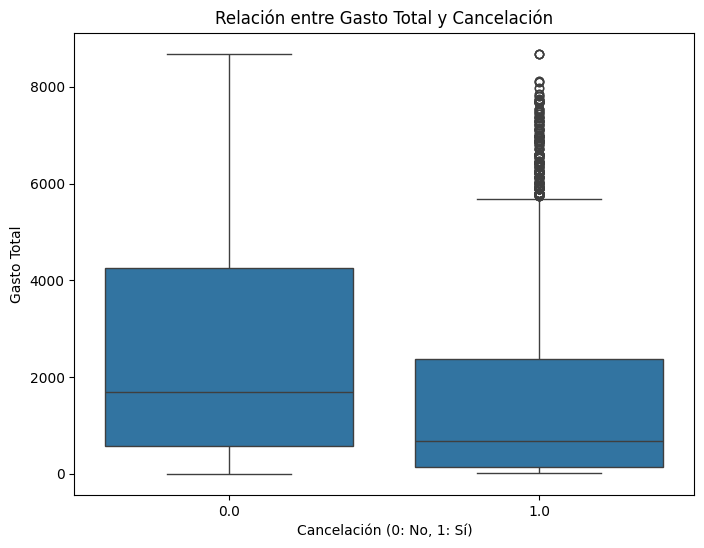

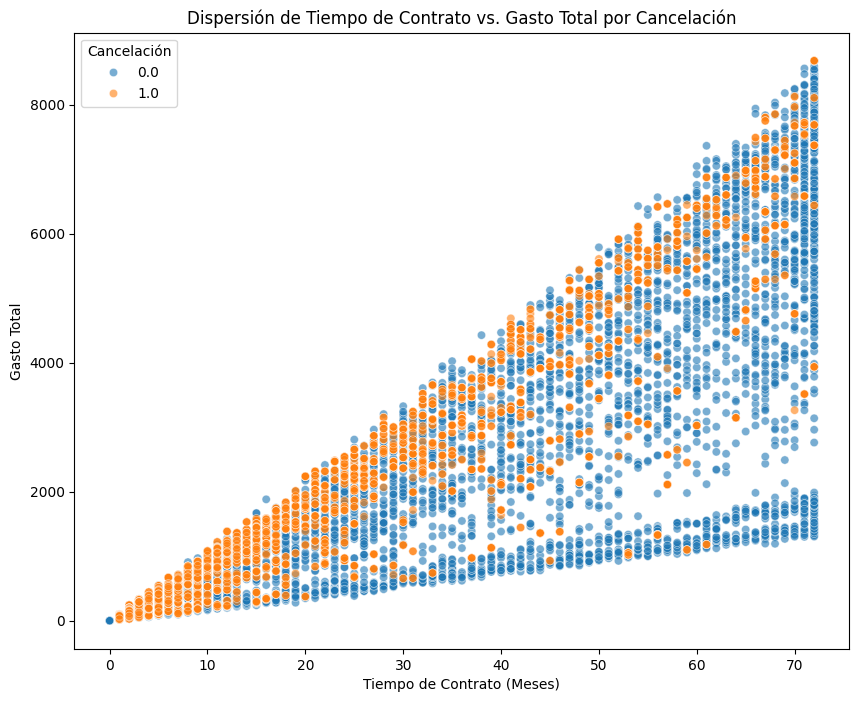

In [26]:
# Análisis de 'Tiempo de contrato' (tenure) vs. Cancelación (Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_normalizado)
plt.title('Relación entre Tiempo de Contrato y Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (Meses)')
plt.show()

# Análisis de 'Gasto total' (Charges.Total) vs. Cancelación (Churn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_normalizado)
plt.title('Relación entre Gasto Total y Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Gasto Total')
plt.show()

# Scatter plot de 'tenure' vs 'Charges.Total' coloreado por 'Churn'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df_normalizado, alpha=0.6)
plt.title('Dispersión de Tiempo de Contrato vs. Gasto Total por Cancelación')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Gasto Total')
plt.legend(title='Cancelación')
plt.show()
